In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
dtype_mapping = {
    "GEMS.Station.Number": str,  # Keep as string
    "Sample.Date": str,          # Dates might be stored as strings
    "Parameter.Code": str,       # Categorical data, keep as string
    "Value": "float"             # Ensure numerical values
}

# Load CSV files with proper names
df_conductivity = pd.read_csv("Electrical_Conductance.csv", sep=";", encoding="ISO-8859-1", dtype=dtype_mapping, low_memory=False)
df_turbidity = pd.read_csv("optical.csv", sep=";", encoding="ISO-8859-1", dtype=dtype_mapping, low_memory=False)
df_pH = pd.read_csv("pH.csv", sep=";", encoding="ISO-8859-1", dtype=dtype_mapping, low_memory=False)
df_ecoli = pd.read_csv("Indicator_Organism.csv", sep=";", encoding="ISO-8859-1", dtype=dtype_mapping, low_memory=False)

In [26]:
# Extract relevant columns
df_conductivity_simplified = df_conductivity[["GEMS.Station.Number", "Sample.Date", "Parameter.Code", "Value"]]
df_turbidity_simplified = df_turbidity[["GEMS.Station.Number", "Sample.Date", "Parameter.Code", "Value"]]
df_pH_simplified = df_pH[["GEMS.Station.Number", "Sample.Date", "Parameter.Code", "Value"]]
df_ecoli_simplified = df_ecoli[["GEMS.Station.Number", "Sample.Date", "Parameter.Code", "Value"]]

In [52]:
df_conductivity.head()

,GEMS.Station.Number,Sample.Date,Sample.Time,Depth,Parameter.Code,Analysis.Method.Code,Value.Flags,Value,Unit,Data.Quality
0,ARG00003,2018-08-22,10:45,0.25,EC,0,NaN,122.84,µS/cm,Fair
1,ARG00003,2018-11-15,15:47,0.20,EC,0,NaN,162.00,µS/cm,Fair
2,ARG00003,2019-02-21,18:21,0.20,EC,0,NaN,158.00,µS/cm,Fair
3,ARG00003,2019-05-08,15:06,0.18,EC,0,NaN,155.00,µS/cm,Fair
4,ARG00003,2019-08-26,15:55,0.27,EC,0,NaN,208.00,µS/cm,Fair


In [54]:
df_turbidity.head()

,GEMS.Station.Number,Sample.Date,Sample.Time,Depth,Parameter.Code,Analysis.Method.Code,Value.Flags,Value,Unit,Data.Quality
0,ARG00003,2018-08-22,10:45,0.25,TURB,0,NaN,29.0,NTU,Fair
1,ARG00003,2018-11-15,15:47,0.20,TURB,0,NaN,311.0,NTU,Fair
2,ARG00003,2019-02-21,18:21,0.20,TURB,0,NaN,257.0,NTU,Fair
3,ARG00003,2019-05-08,15:06,0.18,TURB,0,NaN,258.0,NTU,Fair
4,ARG00003,2019-08-26,15:55,0.27,TURB,0,NaN,75.0,NTU,Fair


In [36]:
# Combine all datasets
df_combined = pd.concat([df_conductivity, df_turbidity, df_pH, df_ecoli])

In [38]:
df_combined["Sample.Date"] = pd.to_datetime(df_combined["Sample.Date"], errors="coerce")

In [40]:
df_pivot = df_combined.pivot_table(index=["GEMS.Station.Number", "Sample.Date"], 
                                   columns="Parameter.Code", values="Value")

In [56]:
df_pivot.head()

Parameter.Code                   A340  COL-App  COL-True      EC  ECOLI  \
GEMS.Station.Number Sample.Date                                           
ARG00003            2018-08-22    NaN      NaN       NaN  122.84    NaN   
                    2018-11-15    NaN      NaN       NaN  162.00    NaN   
                    2019-02-21    NaN      NaN       NaN  158.00    NaN   
                    2019-05-08    NaN      NaN       NaN  155.00    NaN   
                    2019-08-26    NaN      NaN       NaN  208.00    NaN   

Parameter.Code                   ENTCOCC  FECALCOLI  FECALSTREP  TOTCOLI  \
GEMS.Station.Number Sample.Date                                            
ARG00003            2018-08-22       NaN        NaN         NaN      NaN   
                    2018-11-15       NaN        NaN         NaN      NaN   
                    2019-02-21       NaN        NaN         NaN      NaN   
                    2019-05-08       NaN        NaN         NaN      NaN   
                    2019-08-26       NaN        NaN         NaN      NaN   

Parameter.Code                   TOTMESO  TRANS   TURB    pH  
GEMS.Station.Number Sample.Date                               
ARG00003            2018-08-22       NaN    NaN   29.0  7.75  
                    2018-11-15       NaN    NaN  311.0  7.16  
                    2019-02-21       NaN    NaN  257.0  7.56  
                    2019-05-08       NaN    NaN  258.0  7.10  
                    2019-08-26       NaN    NaN   75.0   NaN

In [42]:
correlation_matrix = df_pivot.corr()

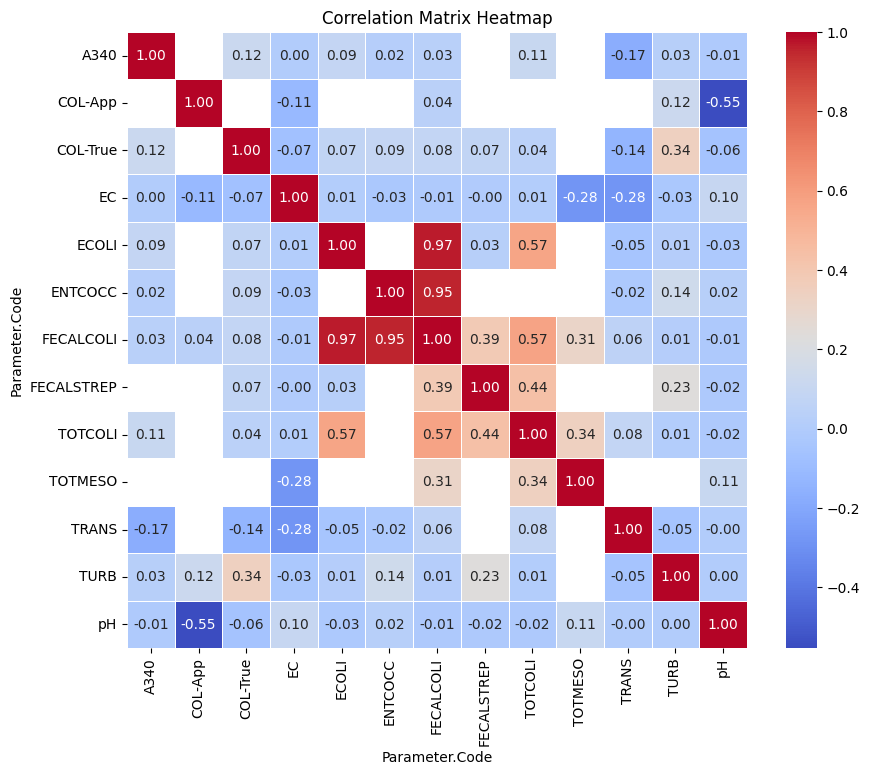

In [44]:
# Display correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

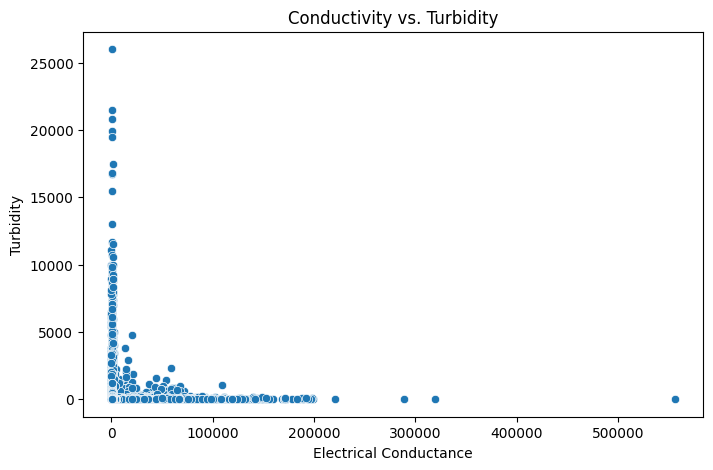

In [58]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_pivot["EC"], y=df_pivot["TURB"])
plt.xlabel("Electrical Conductance")
plt.ylabel("Turbidity")
plt.title("Conductivity vs. Turbidity")
plt.show()

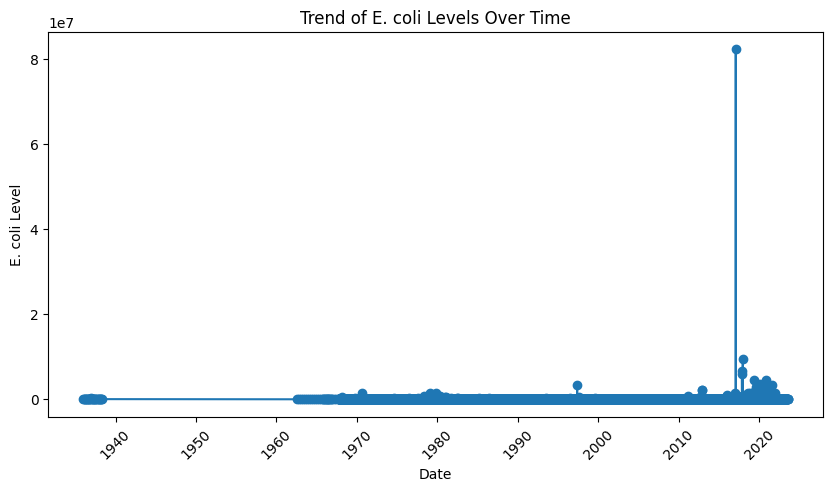

In [60]:
df_ecoli["Sample.Date"] = pd.to_datetime(df_ecoli["Sample.Date"], errors="coerce")
df_ecoli_grouped = df_ecoli.groupby("Sample.Date")["Value"].mean()
plt.figure(figsize=(10, 5))
plt.plot(df_ecoli_grouped.index, df_ecoli_grouped.values, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("E. coli Level")
plt.title("Trend of E. coli Levels Over Time")
plt.xticks(rotation=45)
plt.show()